#### Problem Statement

HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. You have been provided with a dataset named **`"country_data.csv"`**, which includes various features. The dataset comprises the following columns:

  - `country`: Name of the country.
  - `child_mort`: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
  - `exports`: Exports of goods and services as a percentage of the country's GDP.
  - `health`: Health expenditure as a percentage of the country's GDP.
  - `imports`: Imports of goods and services as a percentage of the country's GDP.
  - `income`: Net income per person in USD.
  - `inflation`: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
  - `life_expec`: Life expectancy at birth, indicating the number of years a newborn is expected to live.
  - `total_fer`: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
  - `gdpp`: GDP per capita in USD, representing the average economic output per person.

As a data scientist / AI engineer, your task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

In [3]:
# **Dataset Credits**: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data 

# # Released under MIT License

# #Copyright (c) 2013 Mark Otto.

# #Copyright (c) 2017 Andrew Fong.)

**Import Necessary Libraries**

In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



### Task 1: Data Preparation and Exploration

1. Import the data from the `country_data.csv` file into a pandas DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use the `describe()` function to obtain the complete statistics for each feature.
5. Visualize the distribution of `child_mort, income, and gdpp` using histograms.
6. Create pairplots to visualize relationships between features.


In [2]:
# Import the dataset
df = pd.read_csv('country_data.csv')

# Display the number of rows and columns
print("Number of rows and columns in the dataset:", df.shape)

# Display the first few rows of the dataset in DataFrame format
print("First few rows of the dataset:")
df.head()

Number of rows and columns in the dataset: (167, 10)
First few rows of the dataset:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Basic statistics for each feature.
print("Summary statistics for each feature:")
df.describe()

Summary statistics for each feature:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


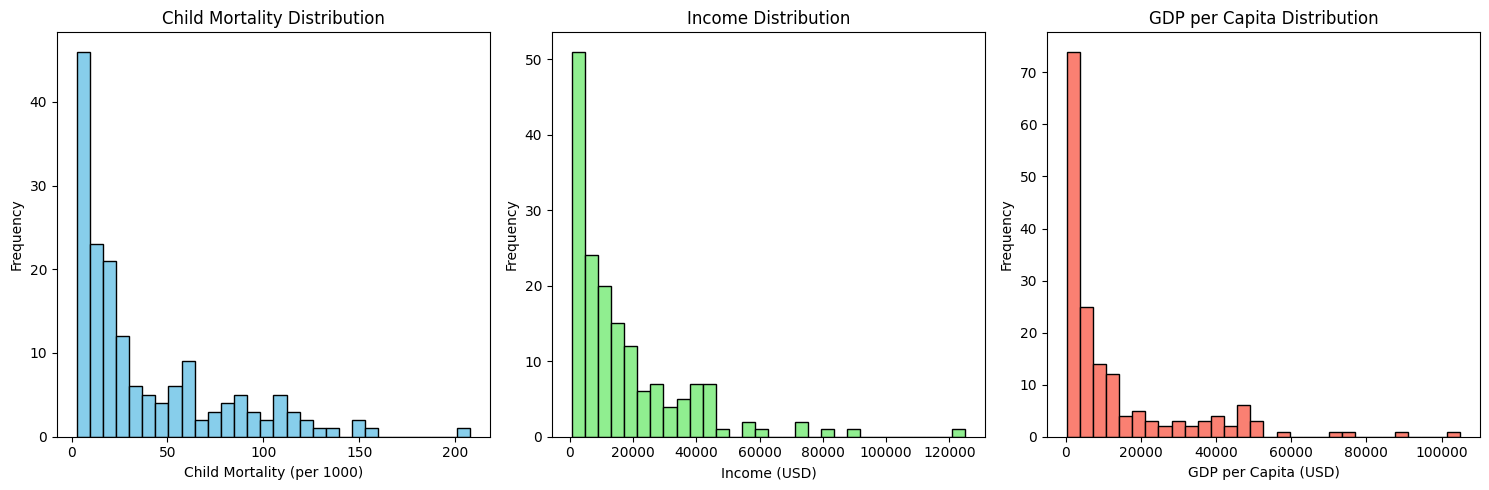

In [4]:
# Visualize the distribution of 'child_mort', 'income', and 'gdpp'
plt.figure(figsize=(15, 5))

#Histogram for child mortality 
plt.subplot(1, 3, 1)
plt.hist(df['child_mort'], bins=30, color='skyblue', edgecolor='black')
plt.title('Child Mortality Distribution')
plt.xlabel('Child Mortality (per 1000)')
plt.ylabel('Frequency')
# Histogram for income
plt.subplot(1, 3, 2)
plt.hist(df['income'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
# Histogram for gdpp
plt.subplot(1, 3, 3)
plt.hist(df['gdpp'], bins=30, color='salmon', edgecolor='black')
plt.title('GDP per Capita Distribution')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

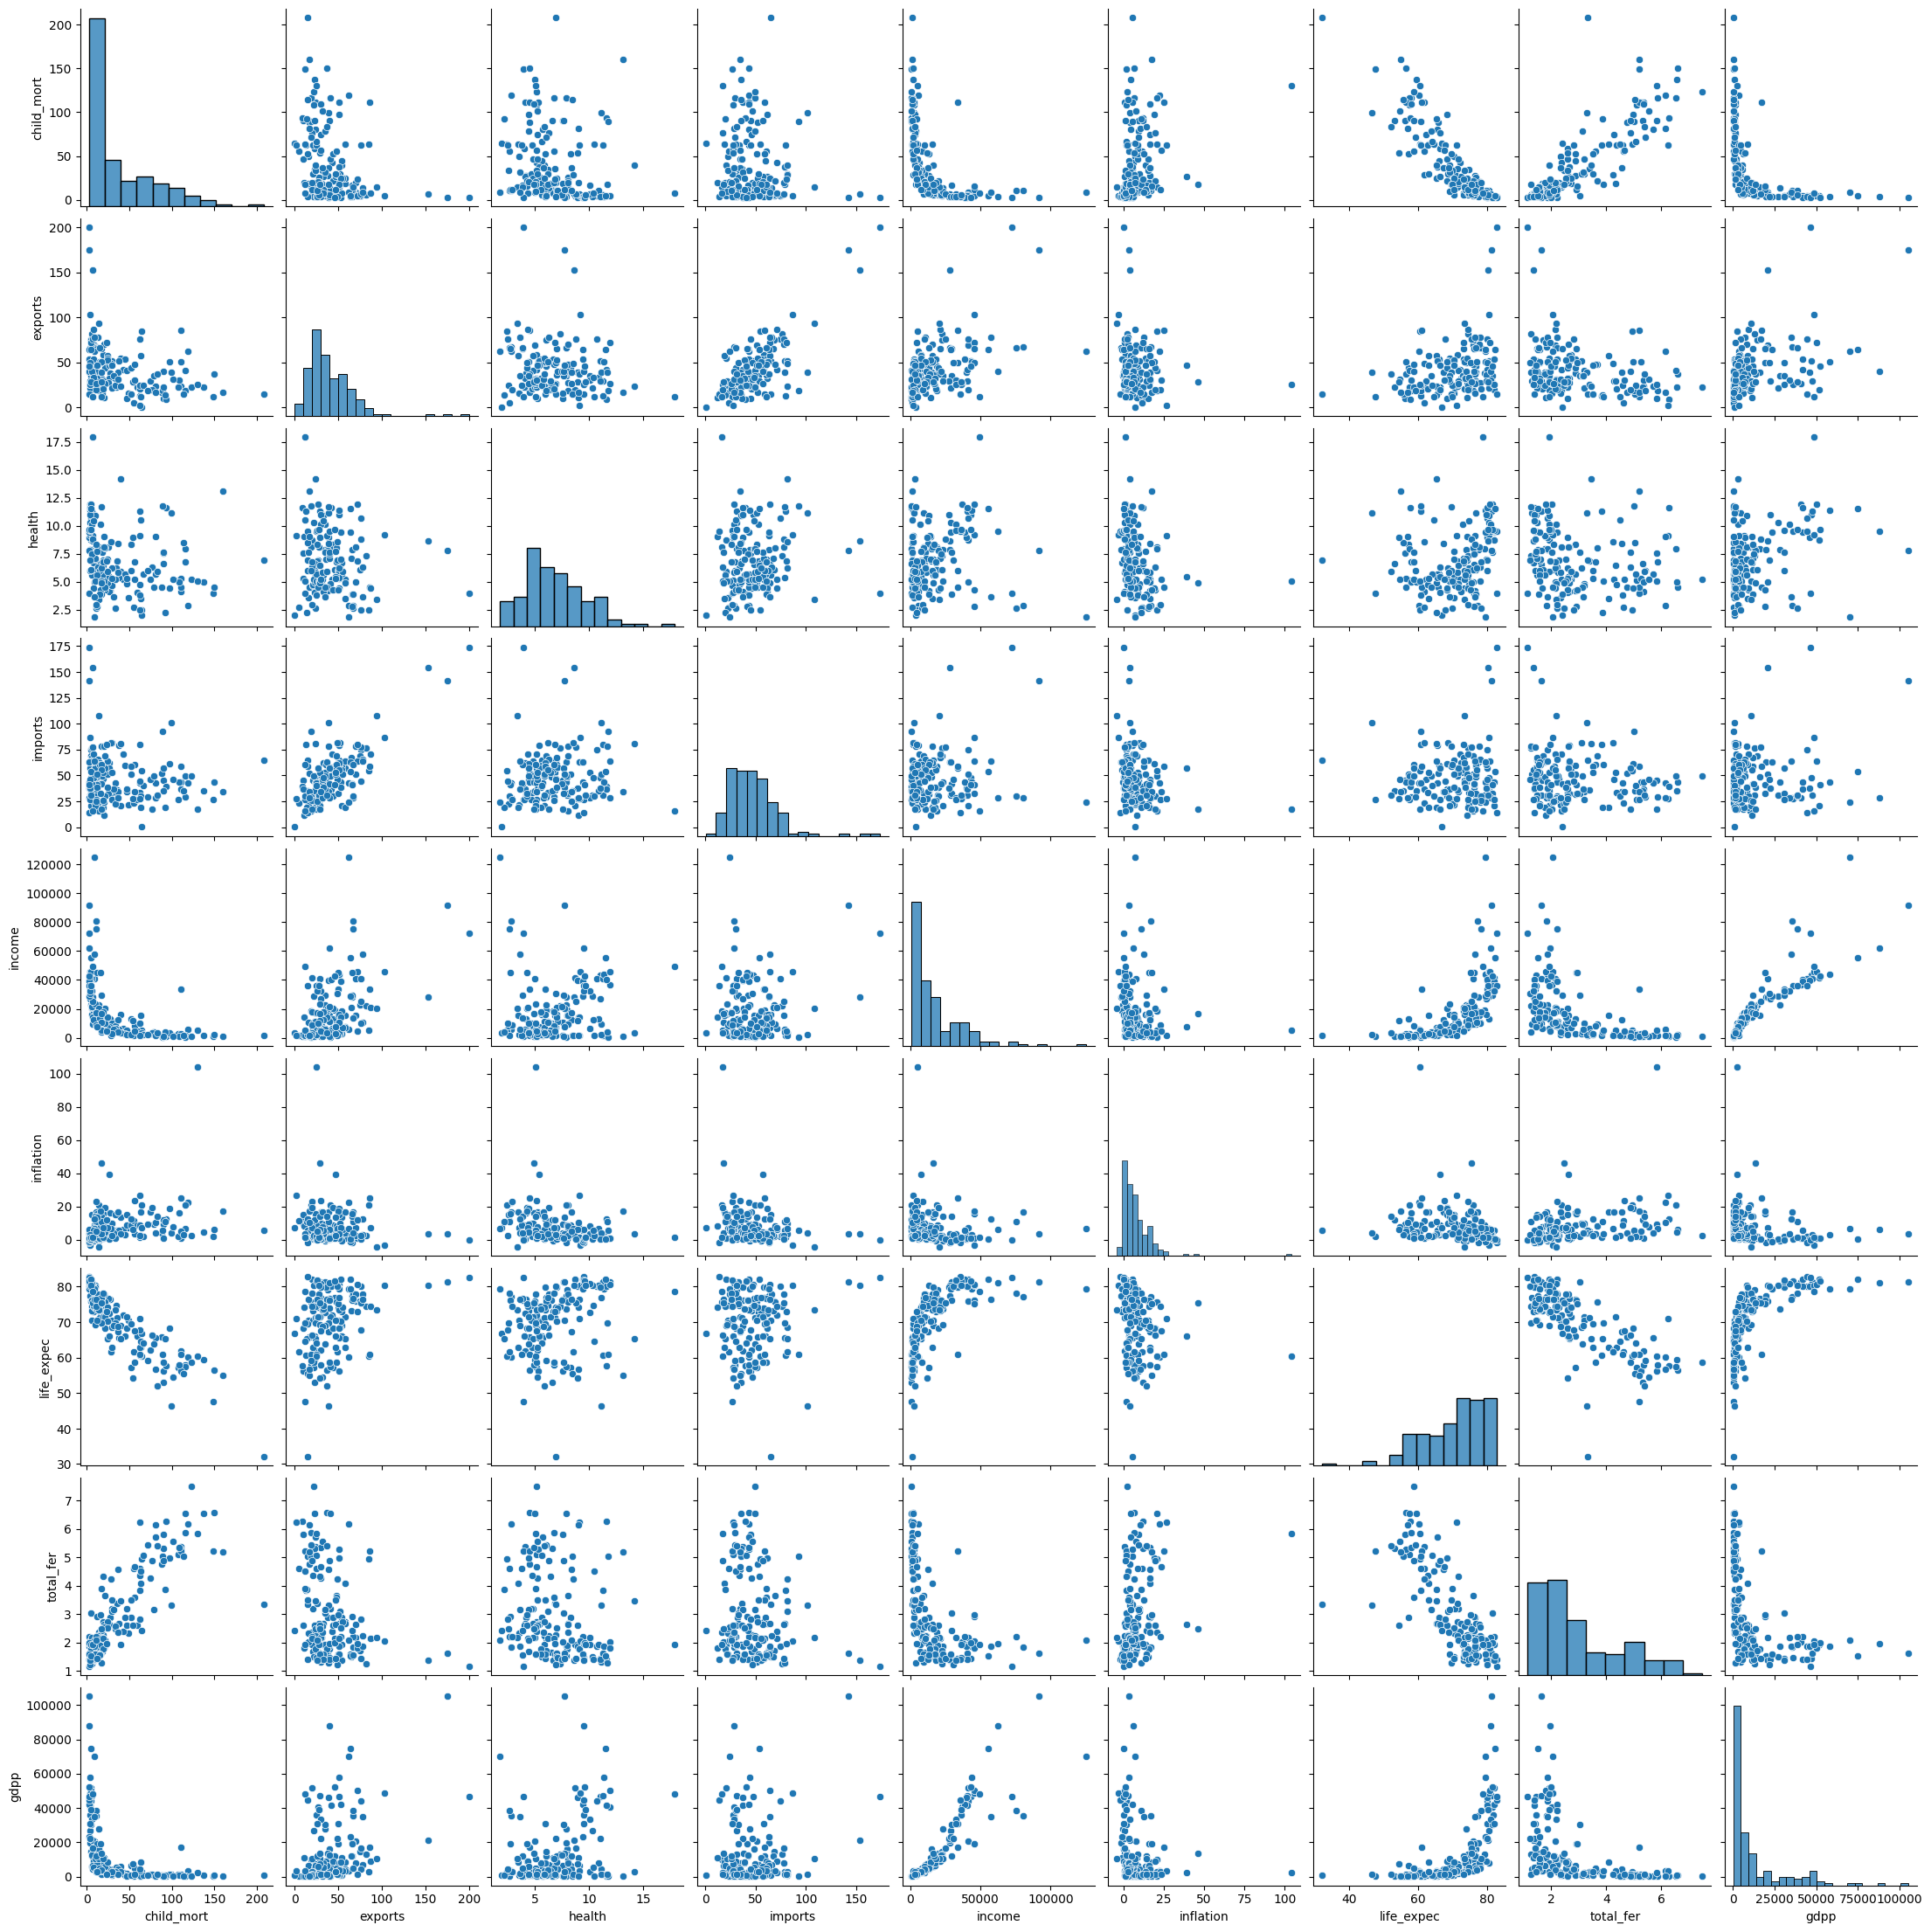

In [5]:
# Create pairplots to visualize relationships between features.
sns.pairplot(df.drop('country', axis=1))
plt.show()


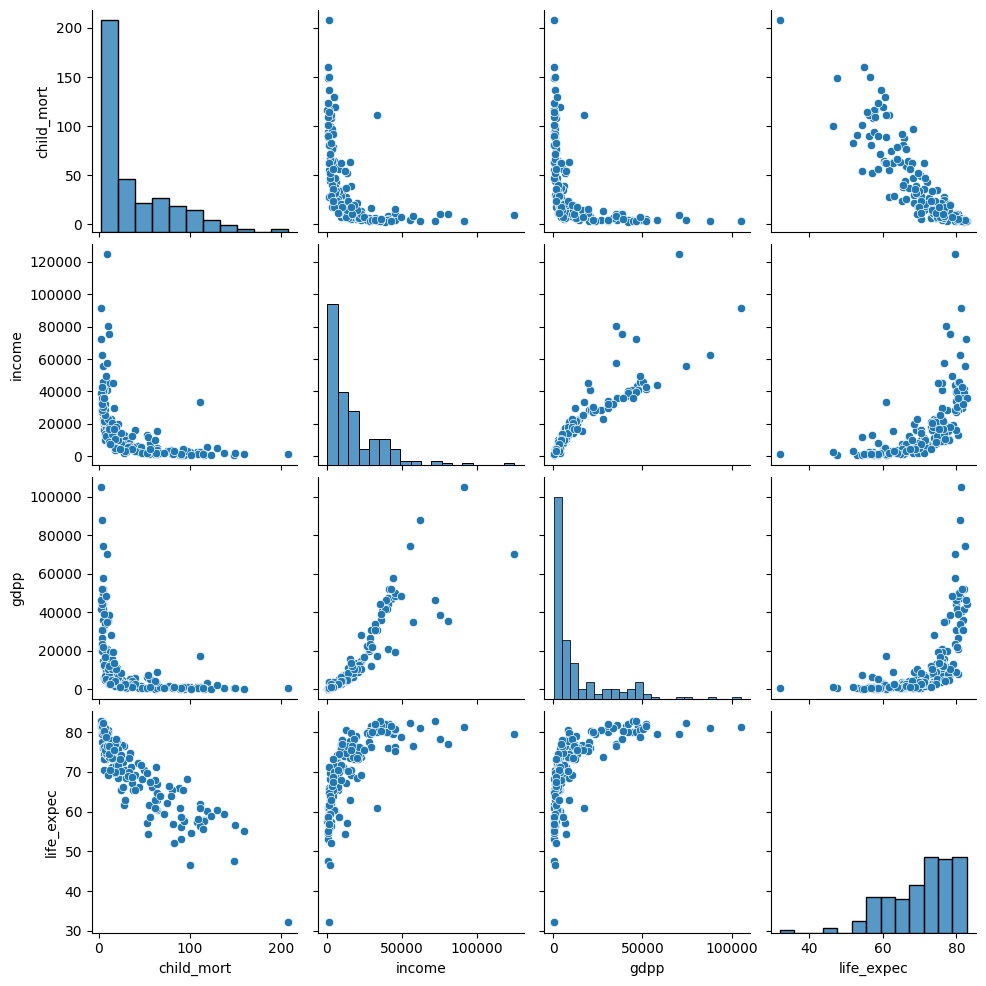

In [6]:
sns.pairplot(df[['child_mort', 'income', 'gdpp', 'life_expec']])
plt.show()

### Task 2: Initial K-means Clustering

1. Drop the `'country'` column since it's not a numerical feature and we can't use it for clustering. Perform this step in a new DataFrame called `'df_cluster1'`.
2. Use StandardScaler to standardize the numerical features in 'df_cluster1', ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.
3. Apply K-Means clustering to the standardized data in 'df_cluster1' with an initial number of clusters (e.g., 4).
4. Print the inertia and centroids obtained from the KMeans model to understand the clustering performance.
5. Add the cluster labels to the original DataFrame 'df'.
6. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [7]:
# Drop the 'country' column since it's not a numerical feature
df_cluster1 = df.drop('country', axis=1)

# Standardize the numerical features
scaler = StandardScaler()
df_cluster1_scaled = scaler.fit_transform(df_cluster1)

df_cluster1_scaled = pd.DataFrame(df_cluster1_scaled, columns=df_cluster1.columns)
#check few rows
print("First few rows of standardized data:")
print(df_cluster1_scaled.head())

First few rows of standardized data:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


In [8]:
# Perform KMeans clustering withh n_clusters as 4
kmeans = KMeans(n_clusters=4, random_state=42)



# Fit the KMeans model to the data (df_cluster)

kmeans.fit(df_cluster1_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
#Print the inertia and centroids

#Inertia
print("Inertia:", kmeans.inertia_)

#Centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_cluster1.columns)
print("\nCentroids (standardized values):\n", centroids)

Inertia: 751.1915754969666

Centroids (standardized values):
    child_mort   exports    health   imports    income  inflation  life_expec  \
0   -0.393282 -0.030584 -0.206179  0.019562 -0.250930  -0.005783    0.226762   
1   -0.827449  0.645080  0.727411  0.190639  1.484243  -0.484921    1.079579   
2    1.393841 -0.454869 -0.177681 -0.166445 -0.709743   0.200563   -1.300734   
3    2.281385 -0.578452 -0.637438 -1.221785 -0.624065   9.129718   -1.134121   

   total_fer      gdpp  
0  -0.402579 -0.355832  
1  -0.791877  1.615995  
2   1.391209 -0.613462  
3   1.916133 -0.581936  


In [10]:
# Add the cluster labels to the original DataFrame 'df'.
df['cluster'] = kmeans.labels_
print("\nFirst few rows of df with cluster labels:")
print(df.head())


First few rows of df with cluster labels:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        2  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        2  
4       1.44        76.8       2.13  12200        0  


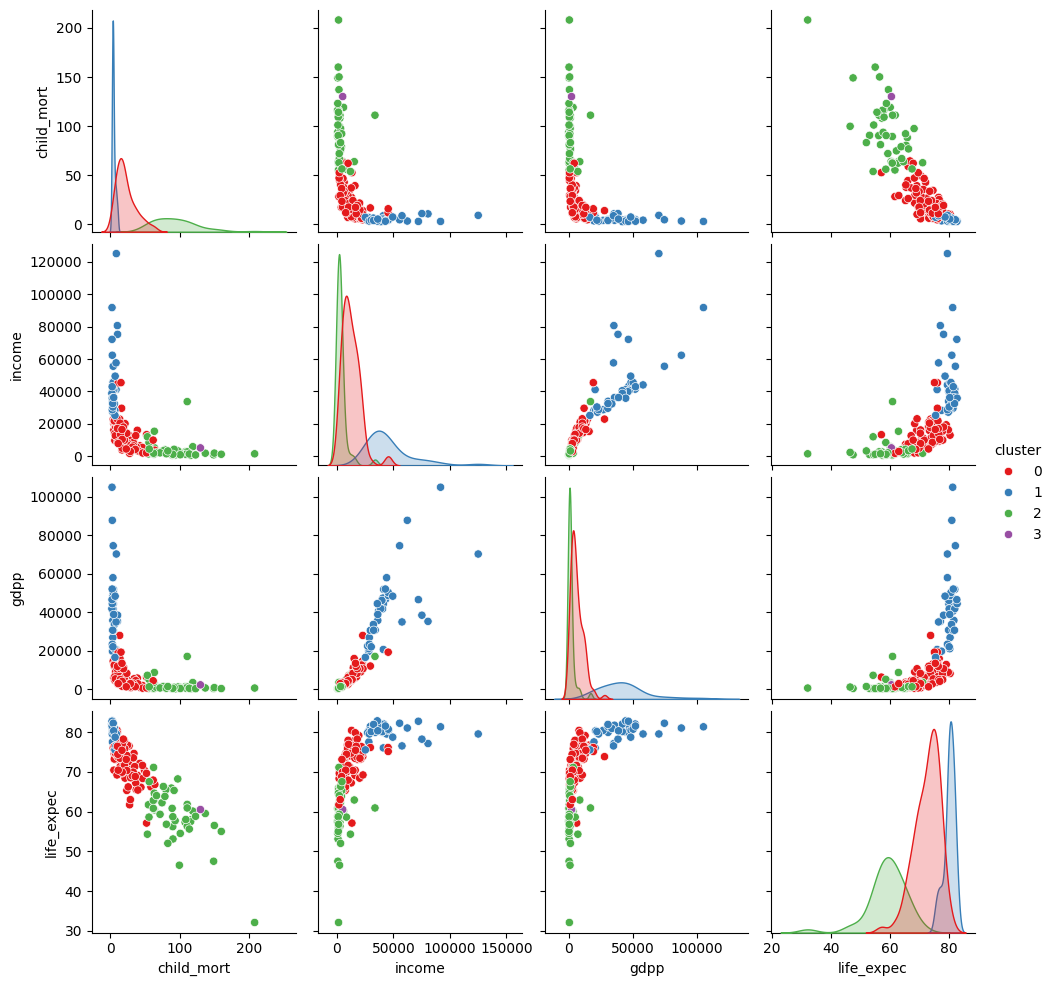

In [11]:
#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.
sns.pairplot(df, vars=['child_mort', 'income', 'gdpp', 'life_expec'], hue='cluster', palette='Set1')
plt.show()


### Task3: Elbow Method for Determining Optimal Clusters

- Use the Elbow Method to determine the optimal number of clusters. Check clusters ranging from 1 to 20.
- Plot the Elbow Method graph to visualize the optimal number of clusters.
- Train the KMeans model using the number of clusters identified by the Elbow Method.

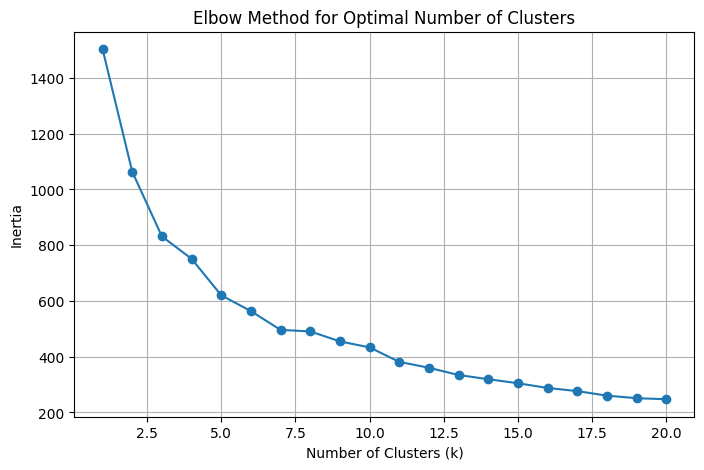

In [14]:
# Determine the optimal number of clusters using the Elbow Method
inertias = []
cluster_range = range(1, 21)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster1_scaled)
    inertias.append(kmeans.inertia_)


# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [15]:
# Train the KMeans model using the number of clusters identified by the Elbow Method.
optimal_k = 3
# Perform KMeans clustering withh optimal n_clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df_cluster1_scaled)
df['cluster_optimal'] = kmeans_optimal.labels_
# Fit the KMeans model to the data (df_cluster)
print("Optimal Inertia:", kmeans_optimal.inertia_)

#assigning the cluster values
centroids_optimal = pd.DataFrame(kmeans_optimal.cluster_centers_, columns=df_cluster1.columns)
print("\nOptimal Centroids (standardized values):\n", centroids_optimal)

Optimal Inertia: 831.5351582151586

Optimal Centroids (standardized values):
    child_mort   exports    health   imports    income  inflation  life_expec  \
0   -0.393282 -0.030584 -0.206179  0.019562 -0.250930  -0.005783    0.226762   
1   -0.827449  0.645080  0.727411  0.190639  1.484243  -0.484921    1.079579   
2    1.413564 -0.457615 -0.187898 -0.189897 -0.707839   0.398989   -1.297031   

   total_fer      gdpp  
0  -0.402579 -0.355832  
1  -0.791877  1.615995  
2   1.402874 -0.612761  


In [13]:
#Print the inertia and centroids

#Inertia


#Centroids


### Task 4: Hierarchical Clustering

1. Apply hierarchical clustering using Agglomerative Clustering with 6 clusters.
2. Use the following parameters: `metric='cosine', linkage='complete'`.
3. Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
4. Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points to ensure clarity.
5. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [16]:
# Apply Agglomerative Clustering (6 clusters, metric='cosine', linkage='complete')
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=6, metric='cosine', linkage='complete')
hierarchical_labels = hierarchical.fit_predict(df_cluster1_scaled)

#Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
df['hierarchical_cluster'] = hierarchical_labels
print("First 10 rows with hierarchical cluster labels:")
print(df.head(10))

First 10 rows with hierarchical cluster labels:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5            Argentina        14.5     18.9    8.10     16.0   18700   
6              Armenia        18.1     20.8    4.40     45.3    6700   
7            Australia         4.8     19.8    8.73     20.9   41400   
8              Austria         4.3     51.3   11.00     47.8   43200   
9           Azerbaijan        39.2     54.3    5.88     20.7   16000   

   inflation  life_expec  total_fer   gdpp  cluster  cluster_optimal  \
0      9.440        56.2       5.82    553        2                2   
1      4.490   

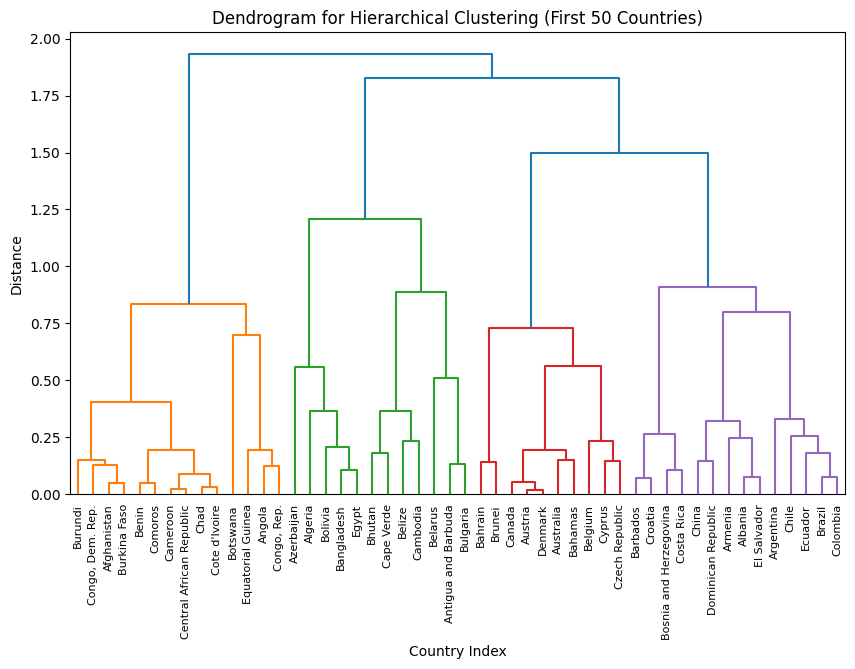

In [17]:
# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points
plt.figure(figsize=(10, 6))
Z = linkage(df_cluster1_scaled[:50], method='complete', metric='cosine')
dendrogram(Z, labels=df['country'][:50].values)
plt.title('Dendrogram for Hierarchical Clustering (First 50 Countries)')
plt.xlabel('Country Index')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


# Perform hierarchical/agglomerative clustering on subset
 

# Plotting the dendrogram for subset


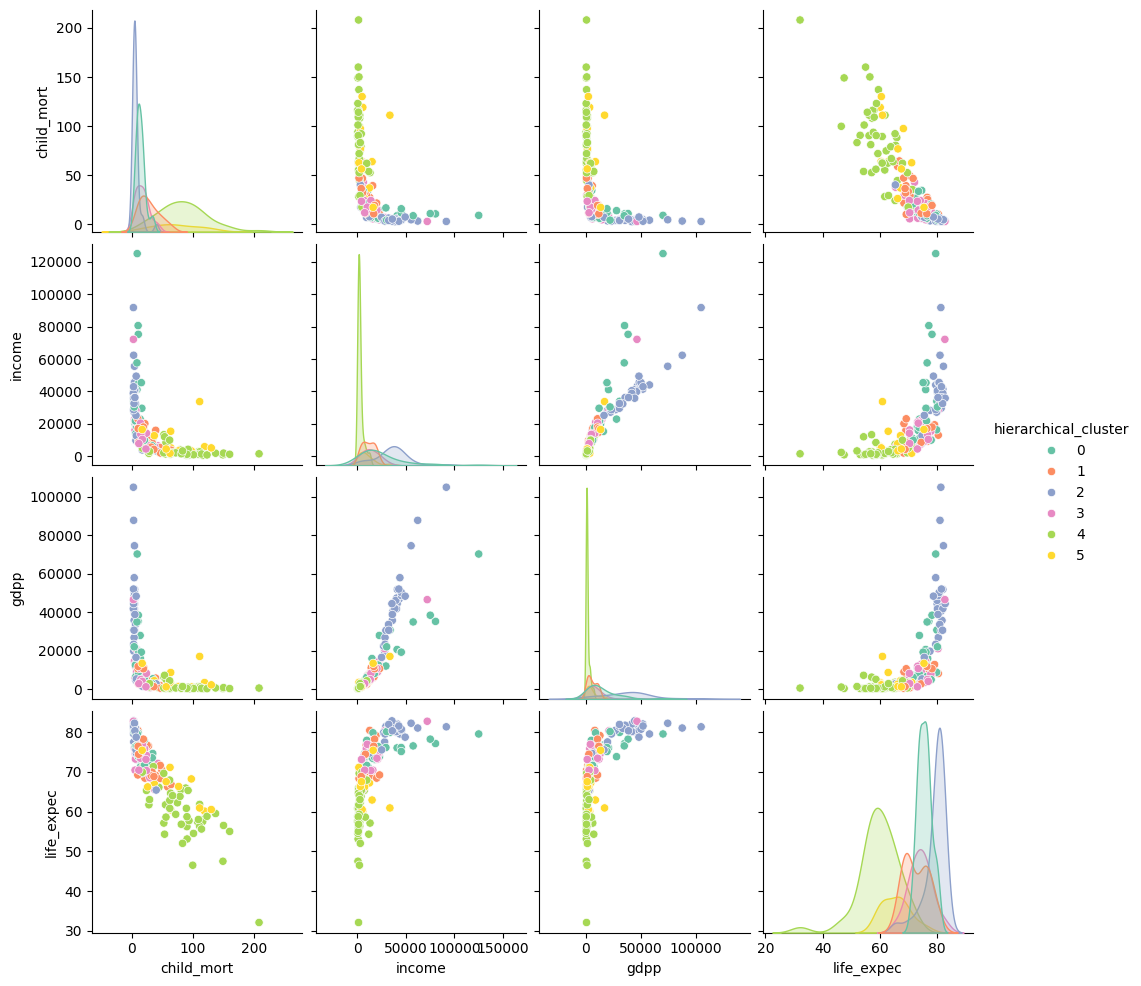

In [18]:
# Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.
sns.pairplot(df, vars=['child_mort', 'income', 'gdpp', 'life_expec'], hue='hierarchical_cluster', palette='Set2')
plt.show()
